In [13]:
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elisadu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
stpwords = stopwords.words('english') + stopwords.words('french')

In [16]:
import itertools
import collections

In [17]:
df = pd.read_csv('../../../data/clean_data/intermediate cleaned data/salaries_and_descriptions.csv',encoding='utf-8')

In [18]:
df.shape

(854, 86)

In [50]:
txt_split = [desc.lower().split() for desc in txt] # lowercase, then tokenize each job desc. 
txt_split2 = list(itertools.chain(*txt_split)) # merge all descriptions into 1 long list
# len(txt_split2)
counts_txt = collections.Counter(txt_split2)
counts_txt.most_common(70) # top 60 most common words - update stopwords list accordingly (so wordcloud more informative) 

[('and', 28911),
 ('to', 17046),
 ('the', 13545),
 ('of', 11309),
 ('in', 8880),
 ('a', 8878),
 ('data', 8862),
 ('with', 7320),
 ('for', 5388),
 ('or', 4858),
 ('experience', 4304),
 ('our', 4254),
 ('we', 3782),
 ('is', 3714),
 ('you', 3233),
 ('as', 3095),
 ('on', 2716),
 ('are', 2659),
 ('business', 2557),
 ('that', 2497),
 ('will', 2427),
 ('an', 2401),
 ('work', 2242),
 ('be', 2207),
 ('team', 1934),
 ('science', 1906),
 ('machine', 1893),
 ('at', 1867),
 ('learning', 1840),
 ('by', 1469),
 ('this', 1468),
 ('other', 1418),
 ('your', 1385),
 ('working', 1362),
 ('new', 1338),
 ('from', 1322),
 ('have', 1245),
 ('ability', 1106),
 ('analytics', 1077),
 ('analysis', 1027),
 ('years', 1024),
 ('solutions', 1010),
 ('using', 999),
 ('models', 999),
 ('skills', 997),
 ('all', 992),
 ('people', 968),
 ('their', 961),
 ('-', 955),
 ('including', 931),
 ('product', 930),
 ('scientist', 920),
 ('can', 887),
 ('complex', 883),
 ('statistical', 878),
 ('such', 875),
 ('build', 874),
 ('tech

In [19]:
common_words = ["-", "work", "working", "employee", "ability", "need", 'able', 'looking','required', 'skill','skills' ,'want', "role", 'position', "using", "including", "related", "&", "across", '·', 'experience', 'e  g', 'use', 'well', 'e', 'g']
stpwords =  common_words + stpwords # update stopwords for wordcloud

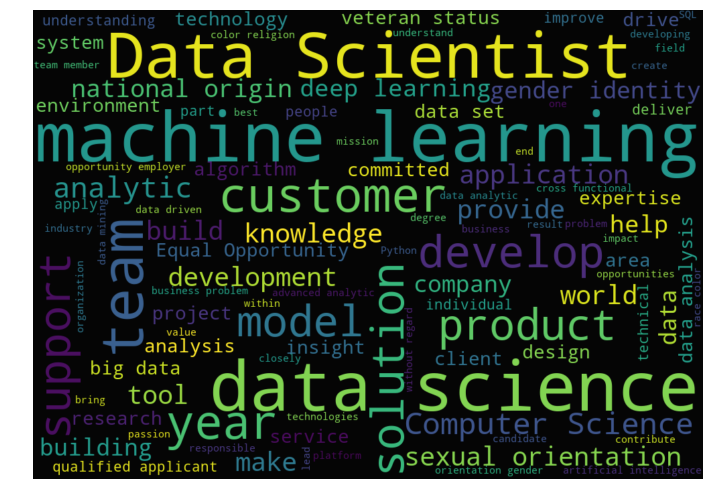

In [185]:
txt = df.Description.values
wc = WordCloud(background_color= 'black', max_words = 100, stopwords = stpwords, width=1000, height = 700)
wc.generate(" ".join(txt))
plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98, interpolation='bilinear')
plt.show()
wc.to_file('../../../figures/exploratory_figures/wordcloud_all.png')

In [20]:
specific_words = ['data', 'science', 'scientist', 'team', 'customer', 'customers', 'company', 'year','years', 'Preferred', 'Qualifications']
specific_stpwords = stpwords + specific_words

In [47]:
def gen_wordcloud(df, position, max_words, words_exclude):
    subs = df[df.Position_clean == position]
    txt = subs.Description.values
    wc = WordCloud(background_color = 'black', max_words = max_words, stopwords = words_exclude,width=1000, height = 700)
    wc.generate(" ". join(txt))
    plt.figure(figsize = (12,9))
    plt.axis('off')
    TITLE = position + ' job descriptions'
    plt.title(TITLE, fontsize = 17)
    plt.imshow(wc.recolor(colormap= 'Spectral' , random_state=200), alpha=0.98, interpolation='bilinear')
    FIG_TITLE = 'wordcloud_' + position + '.png'
    PATH = '../../../figures/exploratory_figures/'
    wc.to_file(PATH + FIG_TITLE)

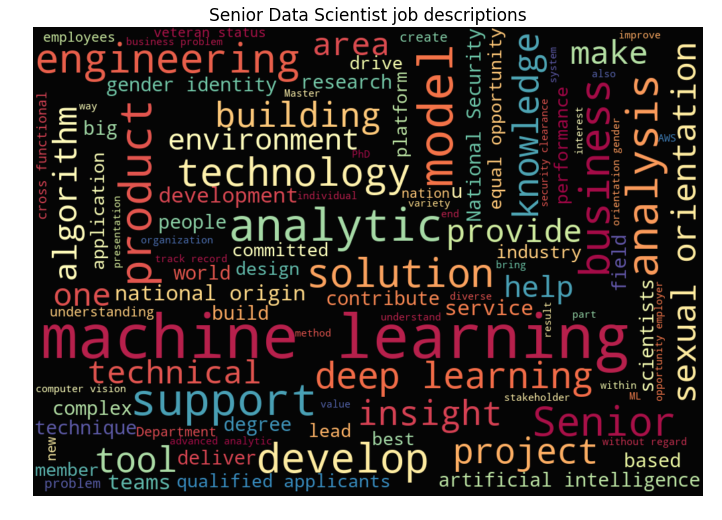

In [48]:
gen_wordcloud(df, 'Senior Data Scientist', 100, specific_stpwords)

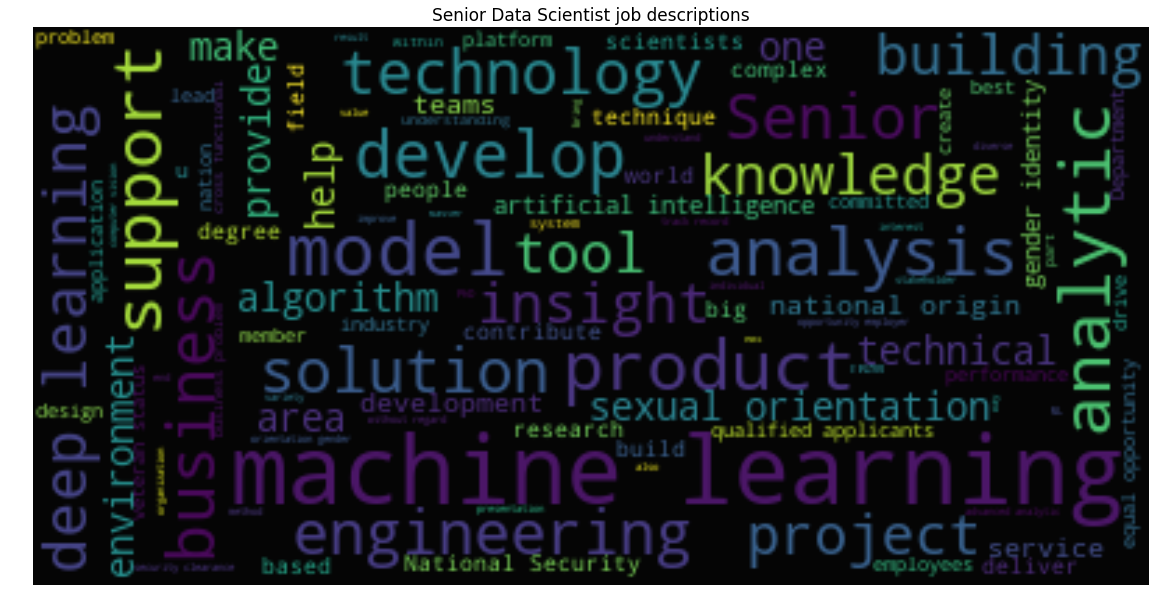

In [194]:
gen_wordcloud(df, 'Senior Data Scientist', 100, specific_stpwords)

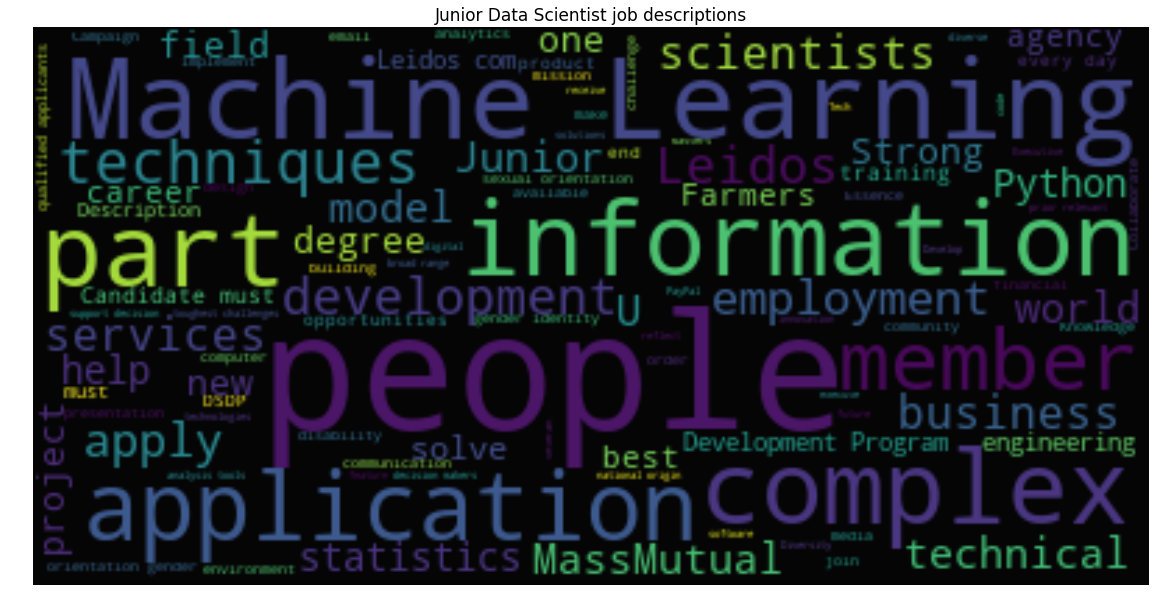

In [190]:
gen_wordcloud(df, 'Junior Data Scientist', 100, specific_stpwords)

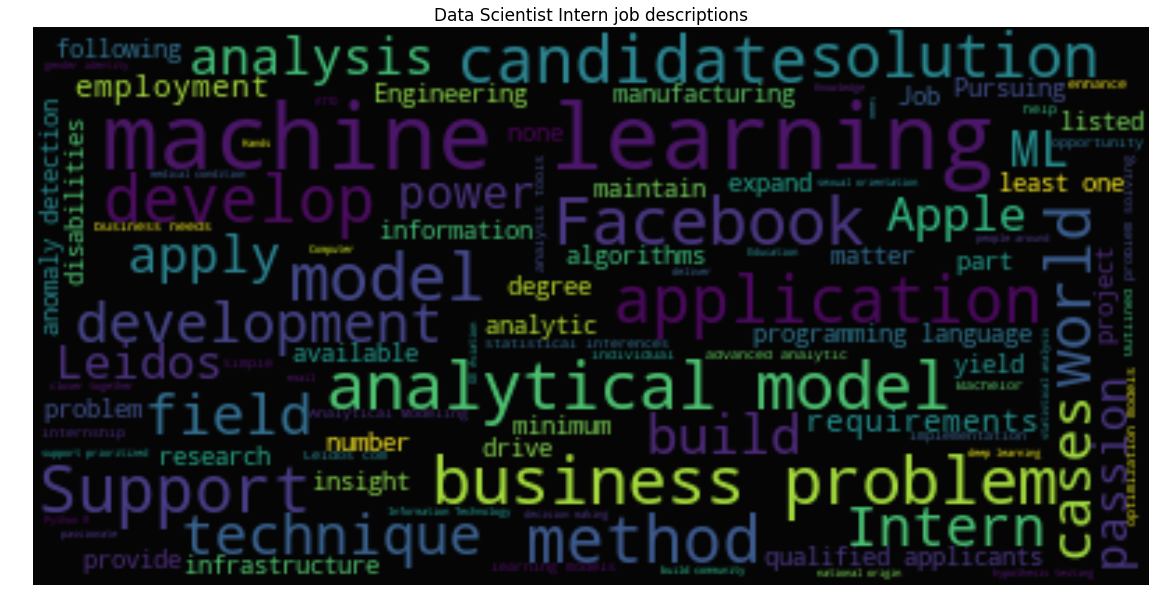

In [195]:
gen_wordcloud(df, 'Data Scientist Intern', 100, specific_stpwords)

Draft code below

<Figure size 432x288 with 0 Axes>

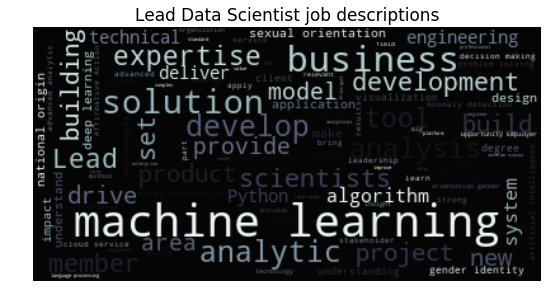

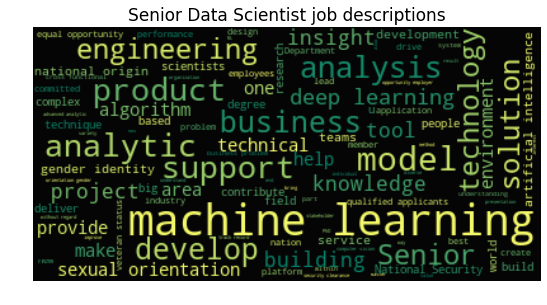

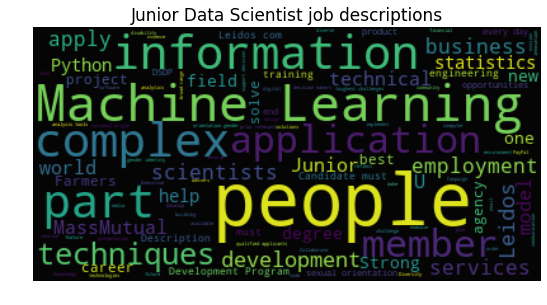

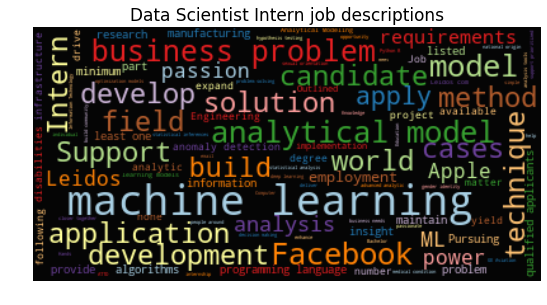

In [188]:
fig = plt.figure()
# wordcloud for LEAD DATA SCIENTIST
subs = df[df.Position_clean == 'Lead Data Scientist']
txt_lds = subs.Description.values
wc_lds = WordCloud(background_color = 'black', max_words = 100, stopwords = specific_stpwords)
wc_lds.generate(" ". join(txt_lds))
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot()
plt.axis('off')
plt.title('Lead Data Scientist job descriptions', fontsize = 17)
plt.imshow(wc_lds.recolor(colormap= 'bone' , random_state=244), alpha=0.98,interpolation='bilinear')
# wordcloud for SENIOR DATA SCIENTIST
subs2 = df[df.Position_clean == 'Senior Data Scientist']
txt_sr = subs2.Description.values
wc_sr = WordCloud(background_color = 'black', max_words = 100, stopwords = specific_stpwords)
wc_sr.generate(" ". join(txt_sr))
plt.figure(figsize = (20,20))
plt.subplot(2,2,2)
plt.plot()
plt.axis('off')
plt.title('Senior Data Scientist job descriptions', fontsize = 17)
plt.imshow(wc_sr.recolor(colormap= 'summer' , random_state=244), alpha=0.98, interpolation='bilinear')
# wordcloud for JUNIOR DATA SCIENTIST
subs3 = df[df.Position_clean == 'Junior Data Scientist']
txt_jr = subs3.Description.values
wc_jr = WordCloud(background_color = 'black', max_words = 100, stopwords = specific_stpwords)
wc_jr.generate(" ". join(txt_jr))
plt.figure(figsize = (20,20))
plt.subplot(2,2,3)
plt.plot()
plt.axis('off')
plt.title('Junior Data Scientist job descriptions', fontsize = 17)
plt.imshow(wc_jr.recolor(colormap= 'viridis' , random_state=244), alpha=0.98, interpolation='bilinear')
# wordcloud for DATA SCI INTERN
subs4 = df[df.Position_clean == 'Data Scientist Intern']
txt_int = subs4.Description.values
wc_int = WordCloud(background_color = 'black', max_words = 100, stopwords = specific_stpwords)
wc_int.generate(" ". join(txt_int))
plt.figure(figsize = (20,20))
plt.subplot(2,2,4)
plt.plot()
plt.axis('off')
plt.title('Data Scientist Intern job descriptions', fontsize = 17)
plt.imshow(wc_int.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98, interpolation='bilinear')


In [167]:
df.Position_clean.unique()

array(['Data Scientist', 'Data Scientist Intern', 'Senior Data Scientist',
       'Lead Data Scientist', 'Junior Data Scientist'], dtype=object)

In [133]:
df.corr()

,Unnamed: 0,Glassdoor Salary Estimate,Unnamed: 0.1,base_pay,bonus_pay,cash_bonus,company_industry_Accounting,company_industry_Advertising & Marketing,company_industry_Aerospace & Defense,company_industry_Airlines,...,company_type_Company - Private,company_type_Company - Public,company_type_Government,company_type_Nonprofit Organization,company_type_Subsidiary or Business Segment,company_year_founded,lower_bound_salary,salary,stock_bonus,upper_bound_salary
Unnamed: 0,1.000000,0.202059,0.635949,0.408715,0.471148,0.130457,-0.049456,0.138660,0.137150,0.064184,...,-0.044591,-0.046550,0.192052,0.019982,0.046731,-0.000791,0.476041,0.415258,0.048033,0.314977
Glassdoor Salary Estimate,0.202059,1.000000,0.179195,0.556039,0.182587,0.198543,NaN,0.045958,-0.075150,NaN,...,-0.034752,0.168797,-0.232785,-0.080758,0.027506,0.175348,0.475147,0.543216,0.452390,0.426592
Unnamed: 0.1,0.635949,0.179195,1.000000,0.438904,0.566156,0.191763,-0.059669,0.083035,0.027086,0.048703,...,-0.201454,0.216026,0.109171,-0.133091,-0.029473,-0.034722,0.533955,0.453805,0.389267,0.249888
base_pay,0.408715,0.556039,0.438904,1.000000,0.516543,0.252635,-0.101598,0.001484,-0.108504,0.108658,...,-0.211047,0.211947,0.010209,-0.010624,0.016698,0.107633,0.804473,0.918254,0.615424,0.784592
bonus_pay,0.471148,0.182587,0.566156,0.516543,1.000000,0.243736,-0.082180,0.082097,0.039782,-0.050582,...,0.056652,0.000446,0.058862,-0.108286,-0.031938,0.024325,0.658195,0.507505,0.420924,0.318349
cash_bonus,0.130457,0.198543,0.191763,0.252635,0.243736,1.000000,-0.065549,-0.025217,-0.030457,-0.085424,...,-0.141591,0.182330,-0.029849,-0.129656,0.058674,0.026364,0.199690,0.254959,0.187176,0.174701
company_industry_Accounting,-0.049456,NaN,-0.059669,-0.101598,-0.082180,-0.065549,1.000000,-0.009733,-0.016620,-0.044431,...,0.117376,-0.094270,-0.011455,-0.014995,-0.008757,-0.139402,-0.083207,-0.099081,NaN,-0.092420
company_industry_Advertising & Marketing,0.138660,0.045958,0.083035,0.001484,0.082097,-0.025217,-0.009733,1.000000,-0.032589,-0.025392,...,0.135830,-0.152963,-0.022469,-0.029405,0.194426,0.024404,0.032110,0.003588,NaN,-0.015693
company_industry_Aerospace & Defense,0.137150,-0.075150,0.027086,-0.108504,0.039782,-0.030457,-0.016620,-0.032589,1.000000,-0.025392,...,-0.114962,0.139206,-0.038351,-0.050191,0.013483,-0.007535,-0.107611,-0.128399,-0.105795,-0.032518
company_industry_Airlines,0.064184,NaN,0.048703,0.108658,-0.050582,-0.085424,-0.044431,-0.025392,-0.025392,1.000000,...,0.210609,-0.206284,NaN,NaN,-0.025392,0.111704,0.165881,0.113248,NaN,0.091469
